# From discrete to continuous

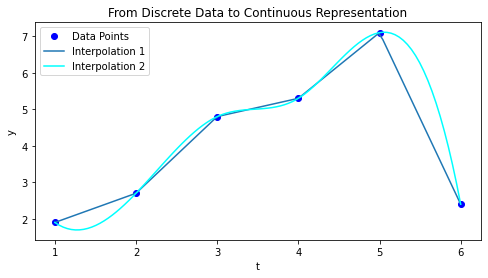

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, make_interp_spline, BSpline

# Data points
t = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
y = [1.9, 2.7, 4.8, 5.3, 7.1, 2.4]

# Create a figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the data points
ax.plot(t, y, 'o', color='blue', label='Data Points')

# Interpolate the data using a polynomial
t_interp = np.linspace(min(t), max(t), 100)
f = interp1d(t, y, kind='linear')
y_interp = f(t_interp)

# Plot the polynomial curve
ax.plot(t_interp, y_interp, label='Interpolation 1')

# Interpolate the data using a spline
t_interp = np.linspace(min(t), max(t), 100)
spl = make_interp_spline(t, y, k=3)
y_spline = spl(t_interp)

# Plot the spline curve
ax.plot(t_interp, y_spline, color='cyan', label='Interpolation 2')

# Add labels and title
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('From Discrete Data to Continuous Representation')

# Add a legend
ax.legend()

# Display the figure
plt.show()


## Type of functions used in Interpolation


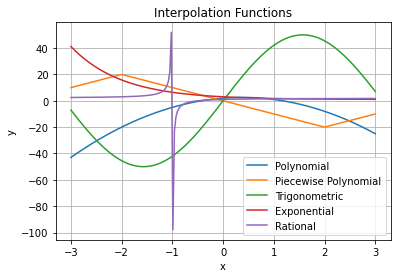

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x-values
x = np.linspace(-3, 3, 201)

# Polynomials
p1 = 2 + 3*x - 4*x**2 
plt.plot(x, p1, label='Polynomial')

# Piecewise polynomials
p2 = np.piecewise(x, [x < -2, (x >= -2) & (x < 2), x >= 2], 
                  [lambda x: 10*x + 40, 
                   lambda x: -10*x, 
                   lambda x: 10*x - 40])
plt.plot(x, p2, label='Piecewise Polynomial')

# Trigonometric functions
p3 = 50*np.sin(x)
plt.plot(x, p3, label='Trigonometric')

# Exponential functions
p4 = 1 + 2*np.exp(-x)
plt.plot(x, p4, label='Exponential')

# Rational functions
p5 = (2*x**2 + 3*x + 1) / (x**2 + 2*x + 1)
plt.plot(x, p5, label='Rational')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation Functions')
plt.legend()
plt.grid()
plt.show()

## Interpolation vs Approximation 


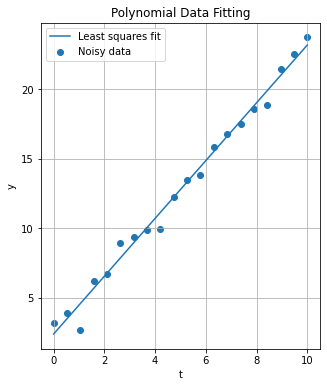

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some noisy data points
x = np.linspace(0, 10, 20)
y_true = 2 * x + 3
y_noisy = y_true + np.random.normal(0, 1, 20)

# Perform least squares fitting
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y_noisy, rcond=None)[0]

# Plot the results
plt.figure(figsize=(5, 6))
plt.scatter(x, y_noisy, label='Noisy data')
#plt.plot(x, y_true, label='True function')
plt.plot(x, m * x + c, label='Least squares fit')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Polynomial Data Fitting')
plt.legend()
plt.grid()
plt.show()

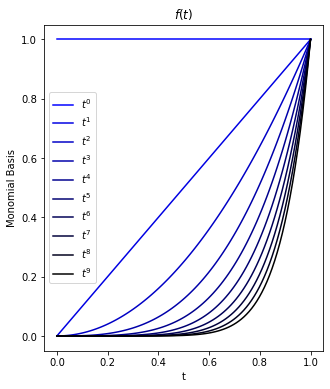

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x-axis range
x = np.linspace(0, 1, 100)

# Define the degree of the monomial basis
max_degree = 9

# Create the figure and axis
fig, ax = plt.subplots(figsize=(5, 6))

# Plot the monomial basis in shades of blue
for i in range(max_degree + 1):
    color = (0, 0, 1 - i / max_degree)  # Shade of blue
    ax.plot(x, x ** i, color = color, label=f"$t^{i}$")

# Set the axis labels and title
ax.set_xlabel("t")
ax.set_ylabel("Monomial Basis")
ax.set_title("$f(t)$")

# Add a legend
ax.legend()

# Show the plot
plt.show()


## Lagrange basis

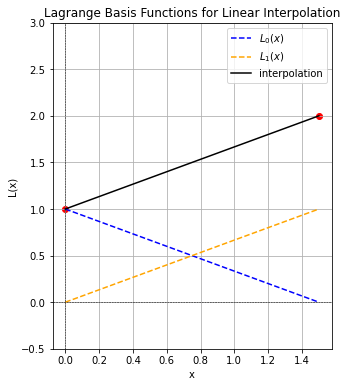

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the two points (x0, y0) and (x1, y1)
x0, y0 = 0, 1  # First point
x1, y1 = 1.5, 2  # Second point

# Define the Lagrange basis functions
def L0(x):
    return (x - x1) / (x0 - x1)

def L1(x):
    return (x - x0) / (x1 - x0)

# Generate x values for plotting
x_values = np.linspace(x0 , x1 , 100)
L0_values = L0(x_values)
L1_values = L1(x_values)

# Create the plot
plt.figure(figsize=(5, 6))
plt.plot(x_values, L0_values, label='$L_0(x)$', color='blue', linestyle='--')
plt.plot(x_values, L1_values, label='$L_1(x)$', color='orange', linestyle='--')
plt.plot(x_values, y0*L0_values + y1*L1_values, label='interpolation', color='k', linestyle='-')
plt.scatter([x0, x1], [y0, y1], color='red')  # Mark the points
plt.title('Lagrange Basis Functions for Linear Interpolation')
plt.xlabel('x')
plt.ylabel('L(x)')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.ylim(y0-1.5, y1+1)  # Set y limits for better visibility
plt.show()

## Cubic Spline 

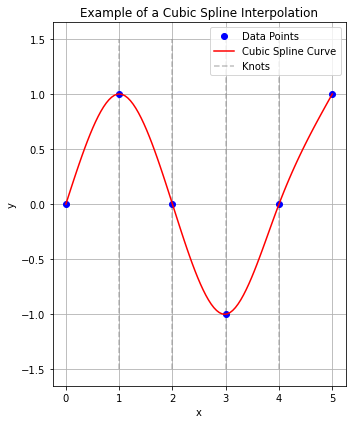

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Data points (x and y values)
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 0, -1, 0, 1])

# Create a cubic spline interpolation of the data points
cs = CubicSpline(x, y, bc_type='natural')  

# Fine grid for a smooth curve
x_fine = np.linspace(0, 5, 100)
y_fine = cs(x_fine)

# Plot
plt.figure(figsize=(5, 6))
plt.plot(x, y, 'o', label="Data Points", color="blue")
plt.plot(x_fine, y_fine, label="Cubic Spline Curve", color="red")
plt.vlines(x[1:-1], min(y)-0.5, max(y)+0.5, color="grey", linestyle="--", alpha=0.5, label="Knots")
plt.title("Example of a Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

plt.show()

## Legendre basis

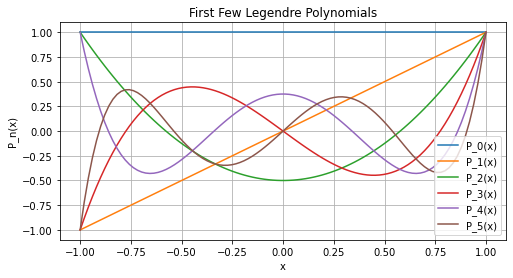

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

# Define range of x values
x = np.linspace(-1, 1, 100)

# Number of polynomials to display
num_polynomials = 6

# Generate and plot each polynomial
plt.figure(figsize=(8, 4))
for n in range(num_polynomials):
    P_n = legendre(n)  # Get the nth Legendre polynomial
    plt.plot(x, P_n(x), label=f'P_{n}(x)')

plt.title('First Few Legendre Polynomials')
plt.xlabel('x')
plt.ylabel('P_n(x)')
plt.legend()
plt.grid(True)
plt.show()